### Import Libraries

In [512]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Utilities
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [513]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pedro\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [514]:
import os
df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'), header=None)

In [515]:
print("=" * 80)
print("📊 DATASET SHAPE INFORMATION")
print("=" * 80)
print(f"Dataset shape: {df.shape}")

📊 DATASET SHAPE INFORMATION
Dataset shape: (7044, 21)


### Exploratory Analysis

In [516]:
# Display first few rows
print("\n" + "=" * 80)
print("📋 FIRST 5 ROWS OF TRAINING DATA")
print("=" * 80)
print(df.head())

# Data types and memory usage
print("\n" + "=" * 80)
print("💾 DATA TYPES AND MEMORY USAGE")
print("=" * 80)
print(df.info())

# Check for missing values
print("\n" + "=" * 80)
print("❓ MISSING VALUES CHECK")
print("=" * 80)
print(f"Missing values in training set: {df.isnull().sum().sum()}")


📋 FIRST 5 ROWS OF TRAINING DATA
           0       1              2        3           4       5   \
0  customerID  gender  SeniorCitizen  Partner  Dependents  tenure   
1  7590-VHVEG  Female              0      Yes          No       1   
2  5575-GNVDE    Male              0       No          No      34   
3  3668-QPYBK    Male              0       No          No       2   
4  7795-CFOCW    Male              0       No          No      45   

             6                 7                8               9   ...  \
0  PhoneService     MultipleLines  InternetService  OnlineSecurity  ...   
1            No  No phone service              DSL              No  ...   
2           Yes                No              DSL             Yes  ...   
3           Yes                No              DSL             Yes  ...   
4            No  No phone service              DSL             Yes  ...   

                 11           12           13               14  \
0  DeviceProtection  TechSupport  S

In [541]:
df.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [517]:
from preprocessing import fillType

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7044 non-null   object
 1   1       7044 non-null   object
 2   2       7044 non-null   object
 3   3       7044 non-null   object
 4   4       7044 non-null   object
 5   5       7044 non-null   object
 6   6       7044 non-null   object
 7   7       7044 non-null   object
 8   8       7044 non-null   object
 9   9       7044 non-null   object
 10  10      7044 non-null   object
 11  11      7044 non-null   object
 12  12      7044 non-null   object
 13  13      7044 non-null   object
 14  14      7044 non-null   object
 15  15      7044 non-null   object
 16  16      7044 non-null   object
 17  17      7044 non-null   object
 18  18      7044 non-null   object
 19  19      7044 non-null   object
 20  20      7044 non-null   object
dtypes: object(21)
memory usage: 1.1+ MB


In [519]:
# Make first row as column labels
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)

# Fill empty values
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

#Change data type to string and number
df = df.astype('string')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int64')
df['tenure'] = df['tenure'].astype('int64')
df['MonthlyCharges'] = df['MonthlyCharges'].astype('float')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 1 to 7043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


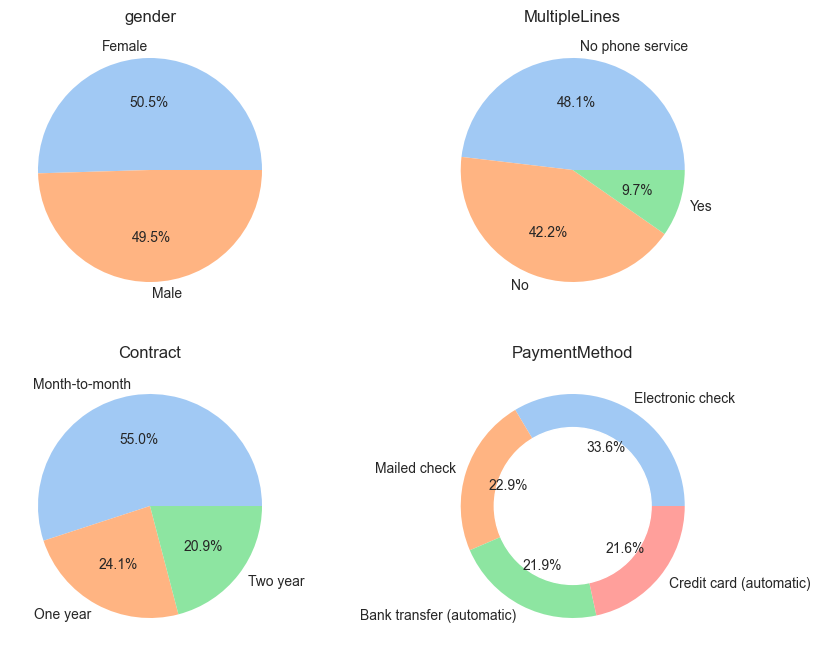

In [521]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#Gender
labels = df["gender"].unique()
axes[0,0].set_title("gender")
axes[0,0].pie(df["gender"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#ContractType
labels = df["Contract"].unique()
axes[1,0].set_title("Contract")
axes[1,0].pie(df["Contract"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#MultipleLines
labels = df["MultipleLines"].unique()
axes[0,1].set_title("MultipleLines")
axes[0,1].pie(df["MultipleLines"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#PaymentMethod
labels = df["PaymentMethod"].unique()
plt.title("PaymentMethod")
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(df["PaymentMethod"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Similarity and Correlation

<Axes: >

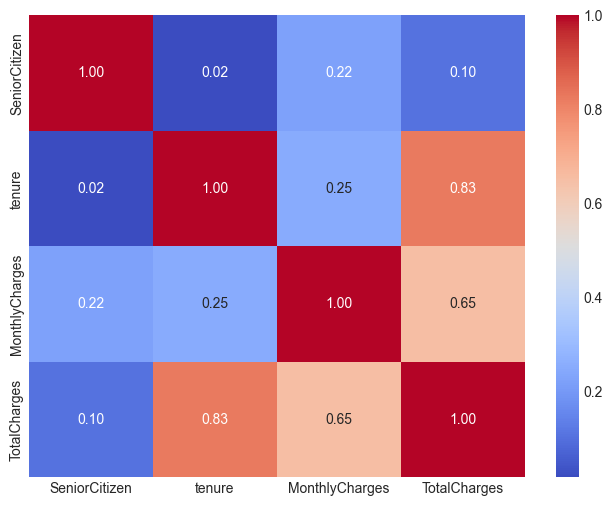

In [522]:
# Define deseases column
numeric_columns = df.select_dtypes(include = ["number"])

# Create a correlation_matrix
correlation_matrix = numeric_columns.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

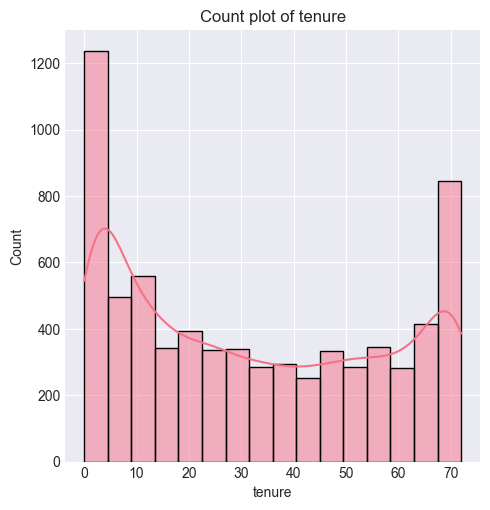

In [523]:
#Tenure
sns.displot(df["tenure"], kde=True, multiple='stack')
plt.title(f"Count plot of tenure")
plt.show()

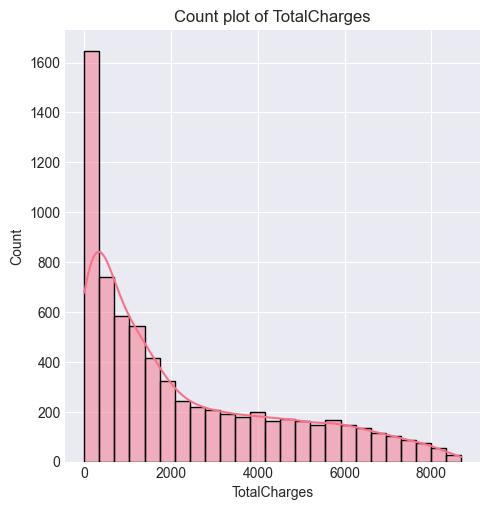

In [524]:
#TotalCharges
sns.displot(df["TotalCharges"], kde=True, multiple='stack')
plt.title(f"Count plot of TotalCharges")
plt.show()

### Variables that are presented in other Features

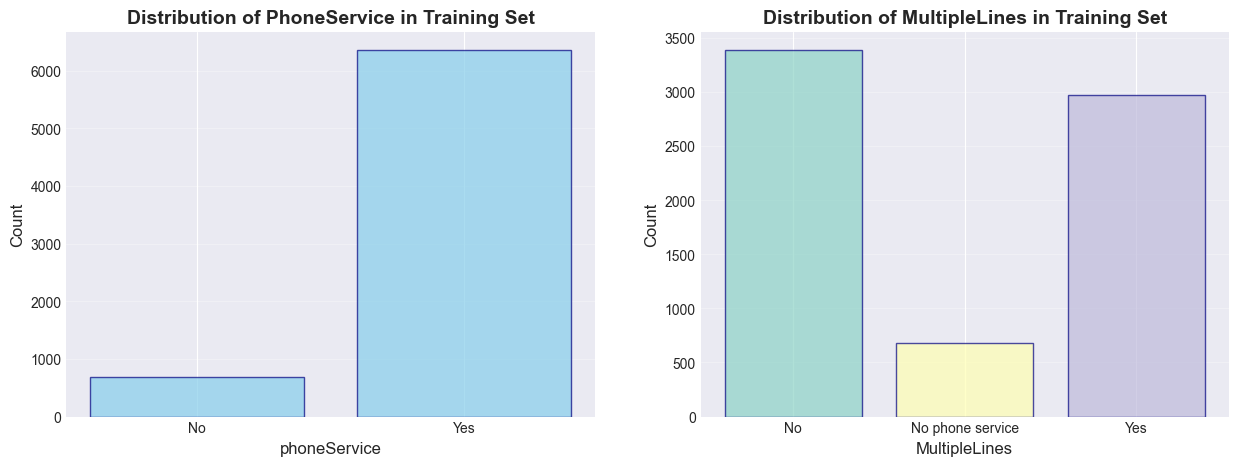


📊 ContractType DISTRIBUTION
Mean count per phoneService: 1173.83
Standard deviation: 940.46
Most common phoneService: ('No', 'No') (appears 2541 times)
Least common phoneService: ('Yes', 'No phone service') (appears 170 times)
Distribution balance: 6.69%


In [525]:
# Analyze the distribution of PhoneService

phoneService_counts = df['PhoneService'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#PhoneService
axes[0].bar (phoneService_counts.index, phoneService_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].set_xlabel('phoneService', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of PhoneService in Training Set', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

MultipleLines_counts = df['MultipleLines'].value_counts().sort_index()

#MultipleLinesa
colors = plt.cm.Set3(range(3))
axes[1].bar (MultipleLines_counts.index, MultipleLines_counts.values, color=colors, edgecolor='navy', alpha=0.7)
axes[1].set_xlabel('MultipleLines', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Distribution of MultipleLines in Training Set', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
plt.show()

num_of_values = df.groupby("Churn")["MultipleLines"].value_counts()

#Statistical summary
print("\n" + "=" * 80)
print("📊 ContractType DISTRIBUTION")
print("=" * 80)
print(f"Mean count per phoneService: {num_of_values.mean():.2f}")
print(f"Standard deviation: {num_of_values.std():.2f}")
print(f"Most common phoneService: {num_of_values.idxmax()} (appears {num_of_values.max()} times)")
print(f"Least common phoneService: {num_of_values.idxmin()} (appears {num_of_values.min()} times)")
print(f"Distribution balance: {(num_of_values.min() / num_of_values.max() * 100):.2f}%")


📊 InternetService DISTRIBUTION
Mean count per InternetService: 1173.83
Standard deviation: 737.67
Most common InternetService: ('No', 'DSL') (appears 1962 times)
Least common InternetService: ('Yes', 'No') (appears 113 times)
Distribution balance: 5.76%


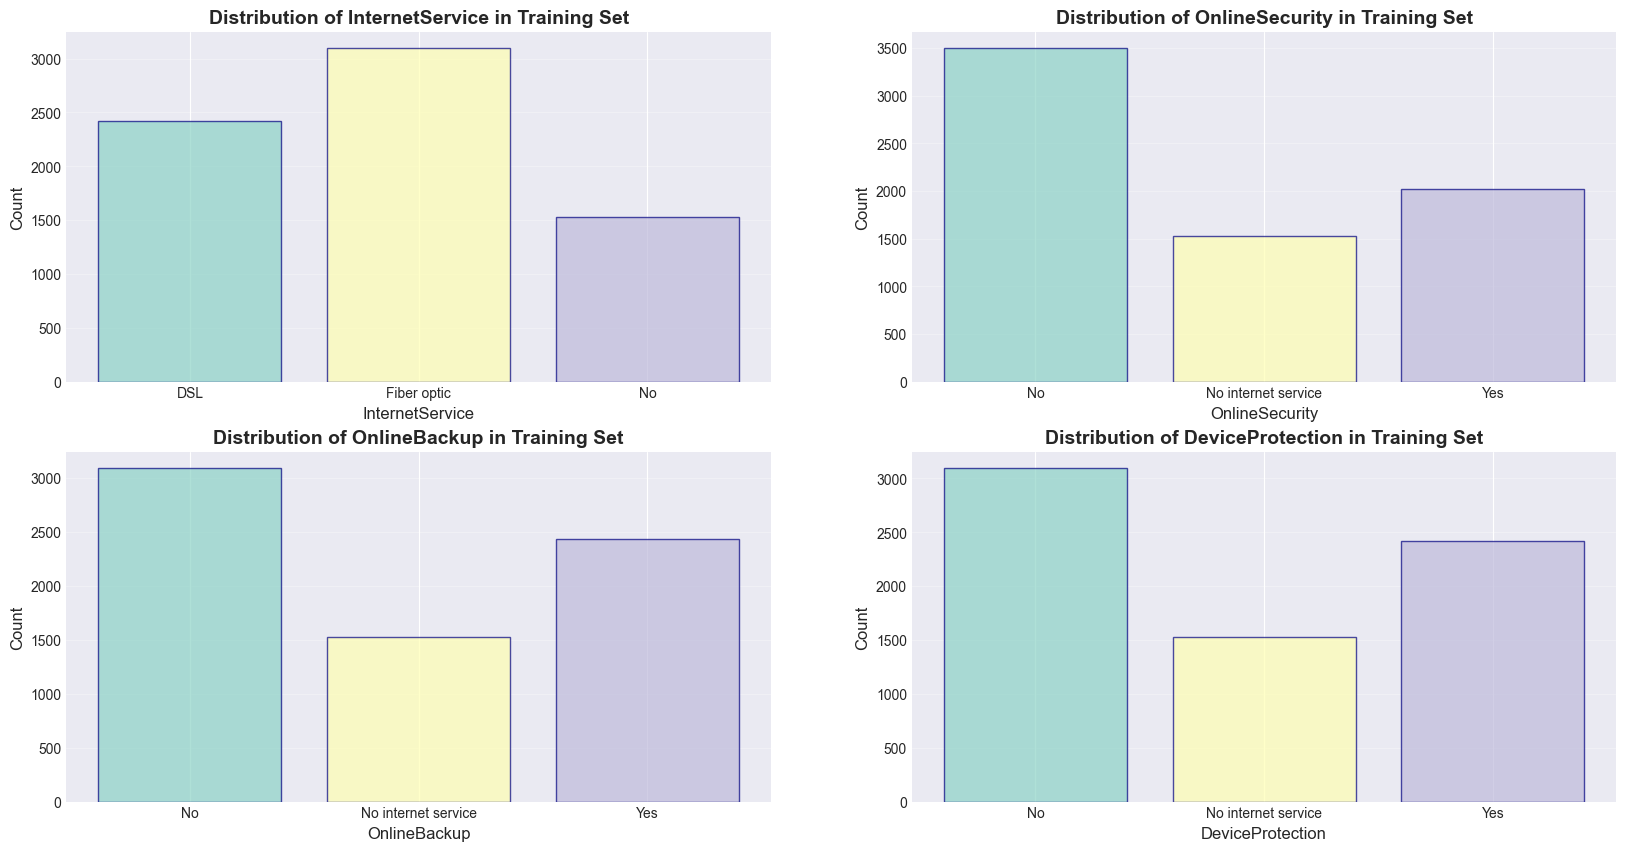

In [526]:
# Analyze the distribution of InternetService

InternetService_counts = df['InternetService'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
colors = plt.cm.Set3(range(3))
#InternetService
axes[0][0].bar (InternetService_counts.index, InternetService_counts.values, color=colors, edgecolor='navy', alpha=0.7)
axes[0][0].set_xlabel('InternetService', fontsize=12)
axes[0][0].set_ylabel('Count', fontsize=12)
axes[0][0].set_title('Distribution of InternetService in Training Set', fontsize=14, fontweight='bold')
axes[0][0].grid(axis='y', alpha=0.3)

OnlineSecurity_counts = df['OnlineSecurity'].value_counts().sort_index()

#OnlineSecurity
axes[0][1].bar (OnlineSecurity_counts.index, OnlineSecurity_counts.values, color=colors, edgecolor='navy', alpha=0.7)
axes[0][1].set_xlabel('OnlineSecurity', fontsize=12)
axes[0][1].set_ylabel('Count', fontsize=12)
axes[0][1].set_title('Distribution of OnlineSecurity in Training Set', fontsize=14, fontweight='bold')
axes[0][1].grid(axis='y', alpha=0.3)

OnlineBackup_counts = df['OnlineBackup'].value_counts().sort_index()

#OnlineBackup
axes[1][0].bar (OnlineBackup_counts.index, OnlineBackup_counts.values, color=colors, edgecolor='navy', alpha=0.7)
axes[1][0].set_xlabel('OnlineBackup', fontsize=12)
axes[1][0].set_ylabel('Count', fontsize=12)
axes[1][0].set_title('Distribution of OnlineBackup in Training Set', fontsize=14, fontweight='bold')
axes[1][0].grid(axis='y', alpha=0.3)

DeviceProtection_counts = df['DeviceProtection'].value_counts().sort_index()

#DeviceProtection
axes[1][1].bar (DeviceProtection_counts.index, DeviceProtection_counts.values, color=colors, edgecolor='navy', alpha=0.7)
axes[1][1].set_xlabel('DeviceProtection', fontsize=12)
axes[1][1].set_ylabel('Count', fontsize=12)
axes[1][1].set_title('Distribution of DeviceProtection in Training Set', fontsize=14, fontweight='bold')
axes[1][1].grid(axis='y', alpha=0.3)

num_of_values = df.groupby("Churn")["InternetService"].value_counts()

#Statistical summary
print("\n" + "=" * 80)
print("📊 InternetService DISTRIBUTION")
print("=" * 80)
print(f"Mean count per InternetService: {num_of_values.mean():.2f}")
print(f"Standard deviation: {num_of_values.std():.2f}")
print(f"Most common InternetService: {num_of_values.idxmax()} (appears {num_of_values.max()} times)")
print(f"Least common InternetService: {num_of_values.idxmin()} (appears {num_of_values.min()} times)")
print(f"Distribution balance: {(num_of_values.min() / num_of_values.max() * 100):.2f}%")

### Churn Balance

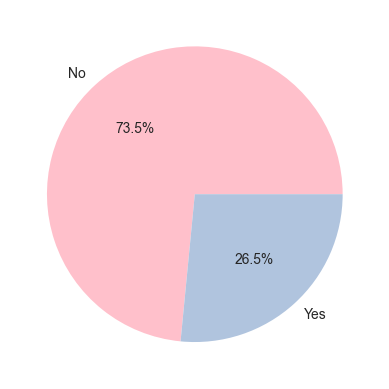


📊 CHURN DISTRIBUTION
Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: Int64


In [527]:
churn_rate = df["Churn"].value_counts()
plt.pie(churn_rate.values, labels= churn_rate.index, colors = ["pink", "lightsteelblue"], autopct="%1.1f%%")
plt.show()

print("\n" + "=" * 80)
print("📊 CHURN DISTRIBUTION")
print("=" * 80)
print(f"Churn distribution:\n{churn_rate}")

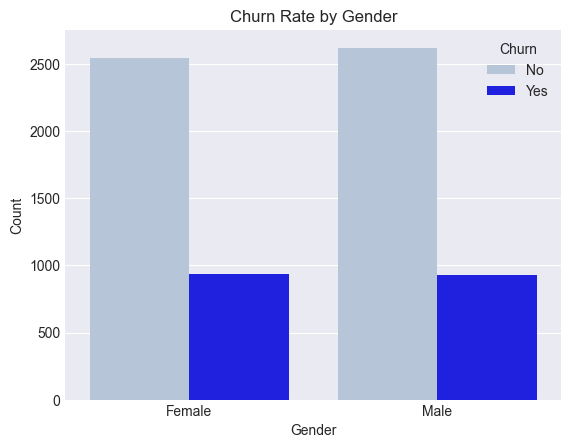

In [528]:
sns.countplot(data= df, x = "gender", hue="Churn",  palette={"lightsteelblue", "blue"})
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

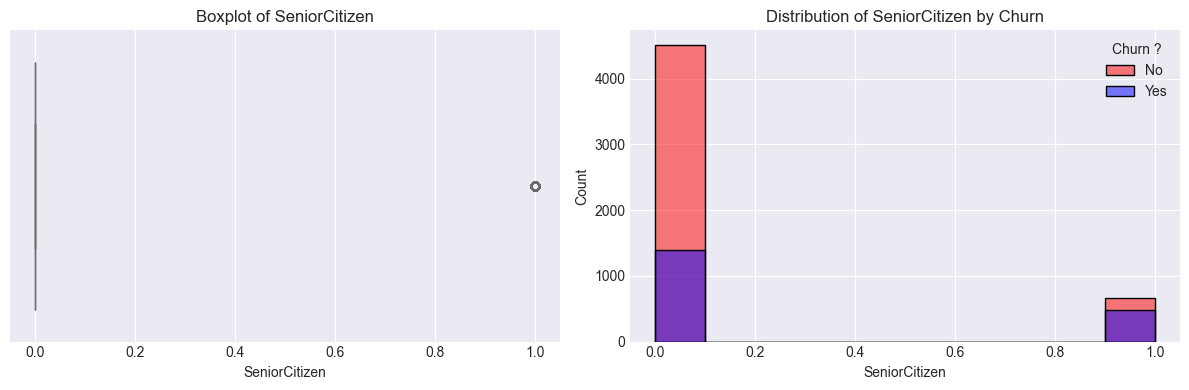

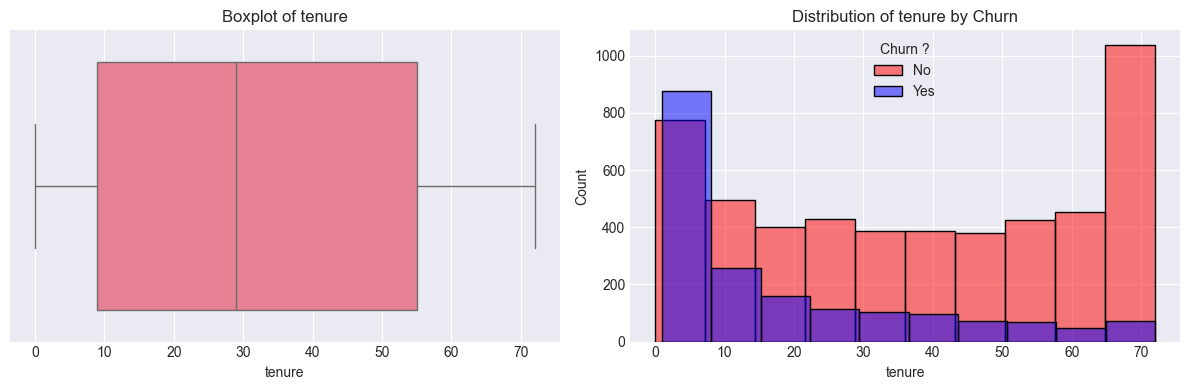

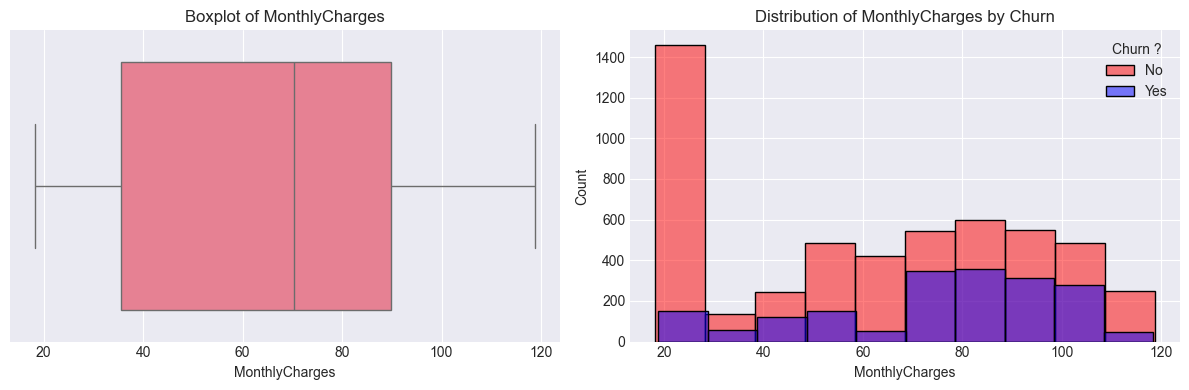

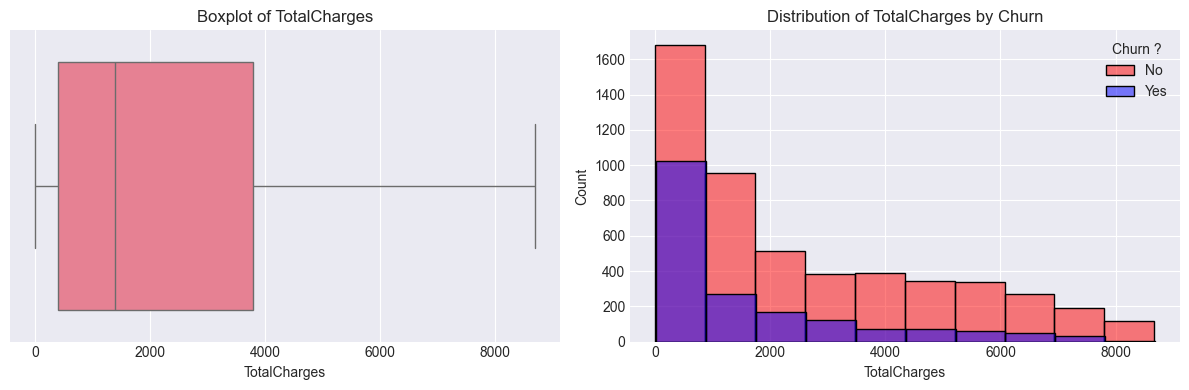

In [529]:
for i in df.select_dtypes('number'):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')

    plt.subplot(1, 2, 2)
    bins = 10
    
    sns.histplot(data=df[df['Churn'] == 'No'], x=i, bins=bins, color='red', kde=False, label='No', alpha=0.5)
    sns.histplot(data=df[df['Churn'] == 'Yes'], x=i, bins=bins, color='blue', kde=False, label='Yes', alpha=0.5)

    plt.title(f'Distribution of {i} by Churn')
    plt.legend(title='Churn ?')

    plt.tight_layout()
    plt.show()

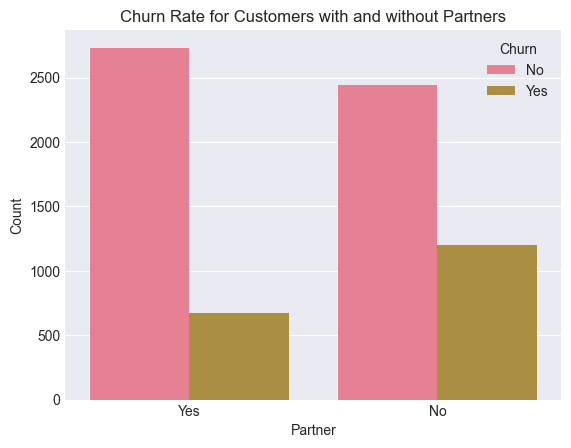

In [530]:
sns.countplot(x= "Partner", hue= "Churn", data =df)
plt.title('Churn Rate for Customers with and without Partners')
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

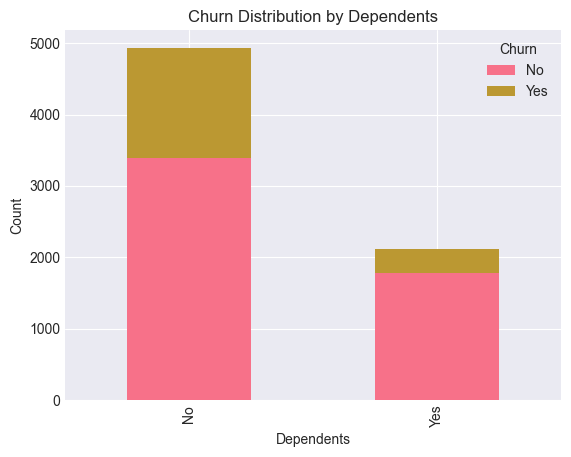

In [531]:
df_grouped = df.groupby(["Dependents", "Churn"]).size().unstack()
df_grouped.plot(kind= "bar", stacked=True)

plt.title("Churn Distribution by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")

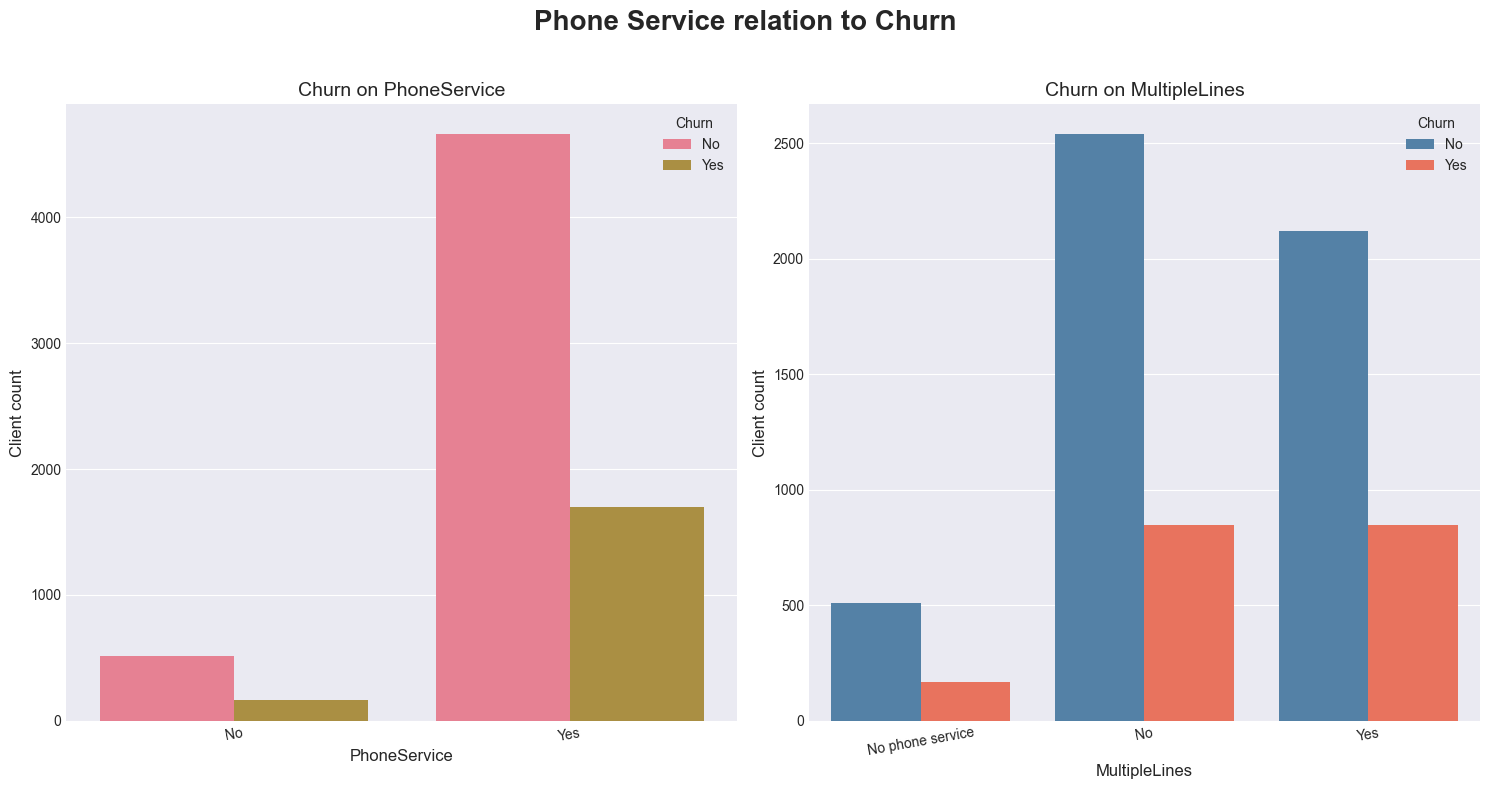

In [532]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Phone Service relation to Churn', fontsize=20, fontweight='bold')

palette = {'Yes': '#ff6347', 'No': '#4682b4'}
    
sns.countplot(x='PhoneService', data=df, ax=axes[0], hue='Churn')
    
axes[0].set_title(f'Churn on PhoneService', fontsize=14)
axes[0].set_xlabel('PhoneService', fontsize=12)
axes[0].set_ylabel('Client count', fontsize=12)
axes[0].legend(title='Churn')
axes[0].tick_params(axis='x', rotation=10)

sns.countplot(data=df, x='MultipleLines', hue='Churn', palette=palette)
    
axes[1].set_title(f'Churn on MultipleLines', fontsize=14)
axes[1].set_xlabel('MultipleLines', fontsize=12)
axes[1].set_ylabel('Client count', fontsize=12)
axes[1].legend(title='Churn')
axes[1].tick_params(axis='x', rotation=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

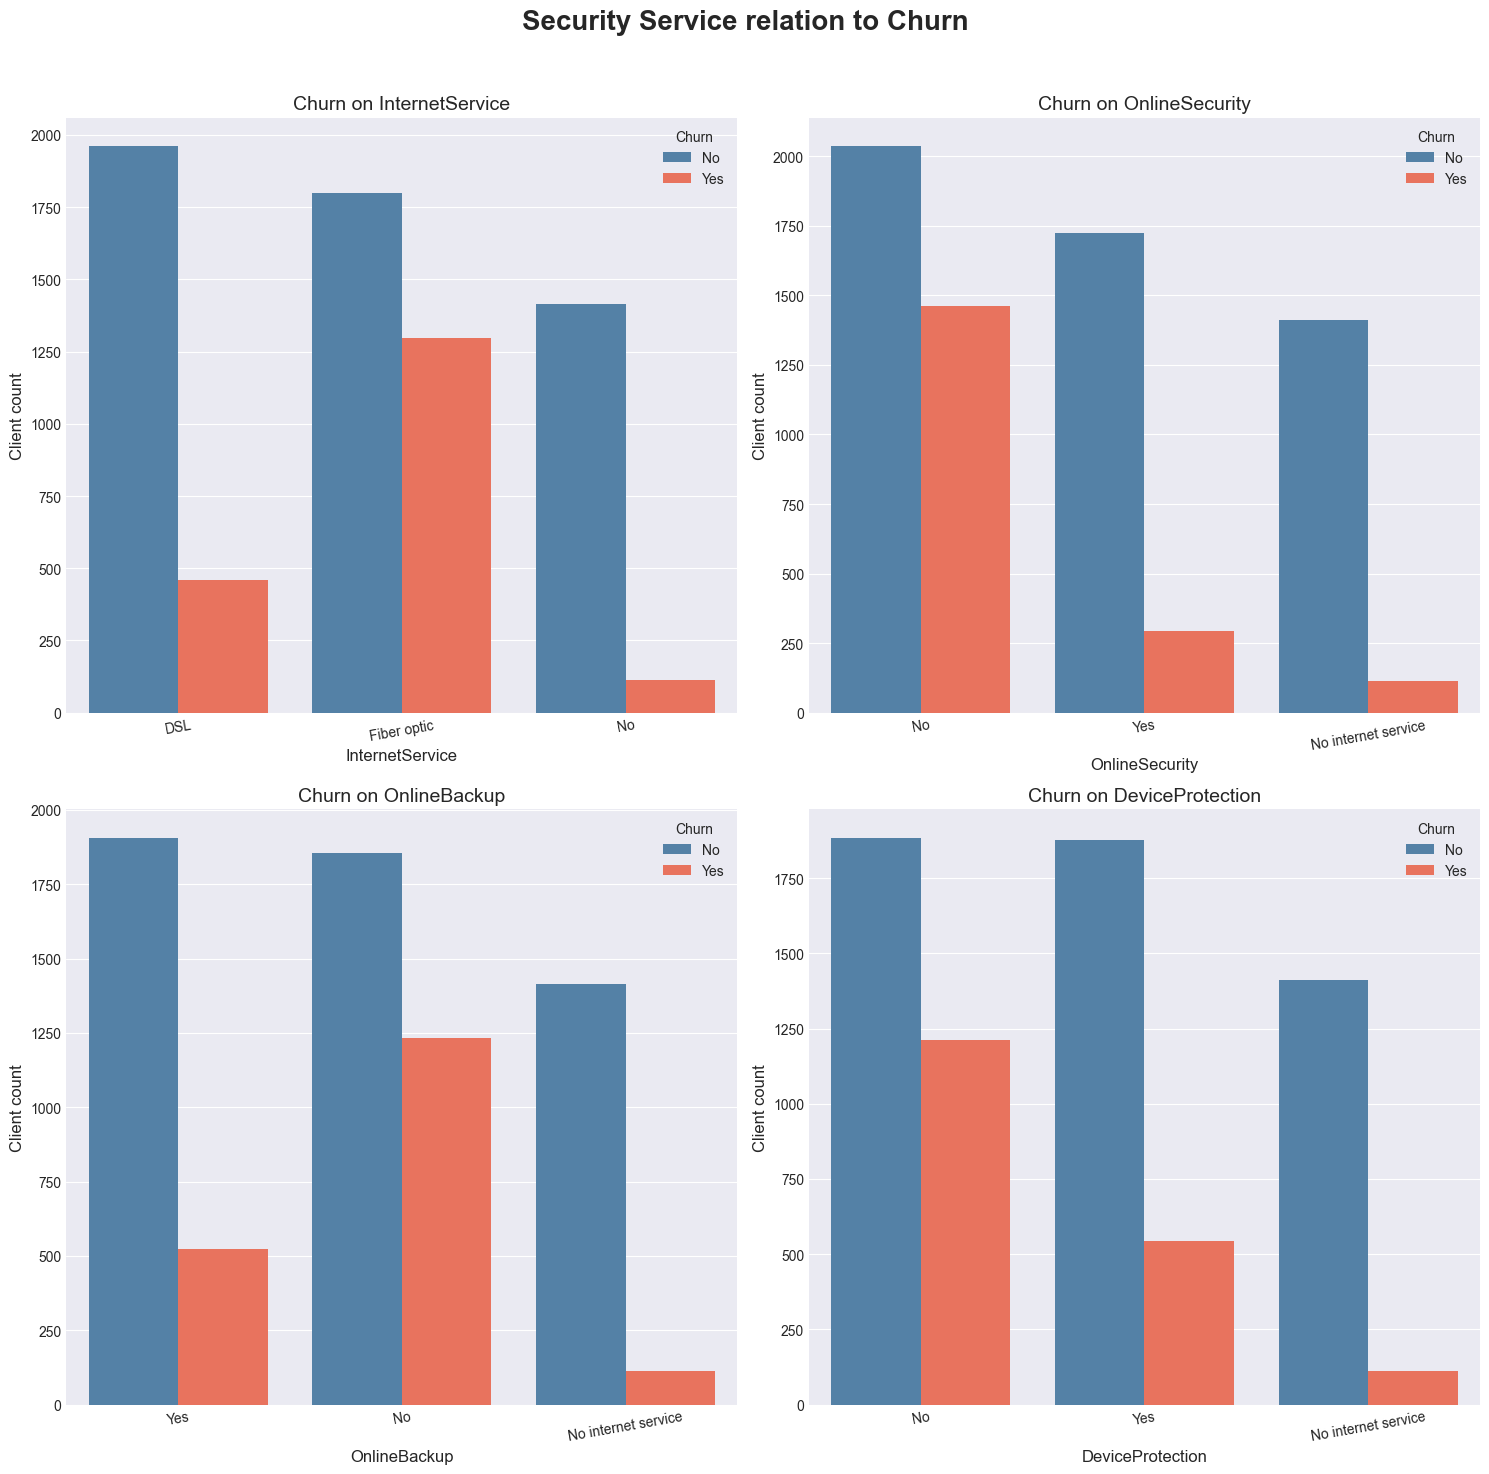

In [533]:
features = [
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection'
]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Security Service relation to Churn', fontsize=20, fontweight='bold')

palette = {'Yes': '#ff6347', 'No': '#4682b4'}

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[row, col], palette=palette)
    
    axes[row, col].set_title(f'Churn on {feature}', fontsize=14)
    axes[row, col].set_xlabel(feature, fontsize=12)
    axes[row, col].set_ylabel('Client count', fontsize=12)
    axes[row, col].legend(title='Churn')
    axes[row, col].tick_params(axis='x', rotation=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

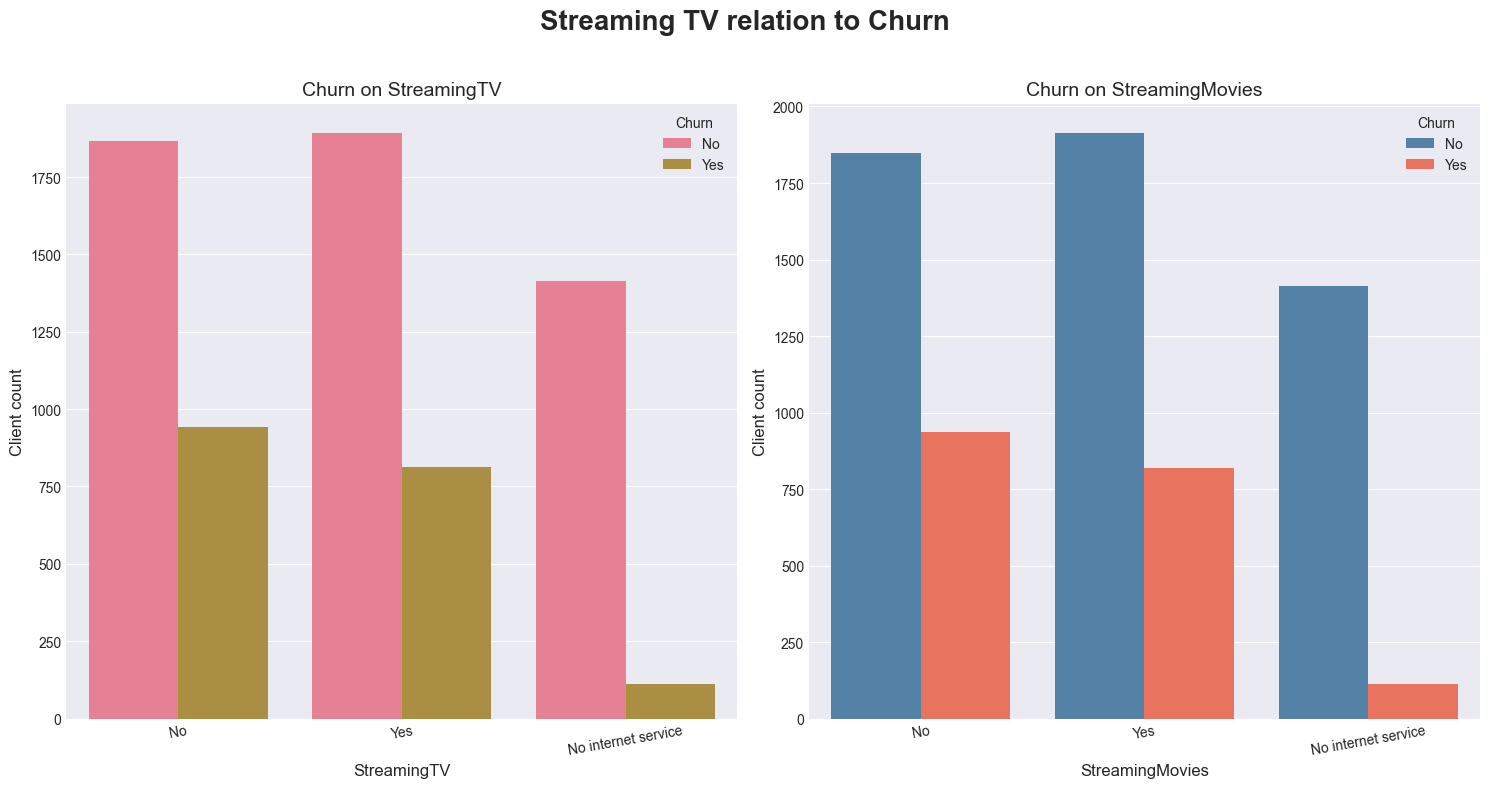

In [534]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Streaming TV relation to Churn', fontsize=20, fontweight='bold')

palette = {'Yes': '#ff6347', 'No': '#4682b4'}
    
sns.countplot(x='StreamingTV', data=df, ax=axes[0], hue='Churn')
    
axes[0].set_title(f'Churn on StreamingTV', fontsize=14)
axes[0].set_xlabel('StreamingTV', fontsize=12)
axes[0].set_ylabel('Client count', fontsize=12)
axes[0].legend(title='Churn')
axes[0].tick_params(axis='x', rotation=10)

sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette=palette)
    
axes[1].set_title(f'Churn on StreamingMovies', fontsize=14)
axes[1].set_xlabel('StreamingMovies', fontsize=12)
axes[1].set_ylabel('Client count', fontsize=12)
axes[1].legend(title='Churn')
axes[1].tick_params(axis='x', rotation=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

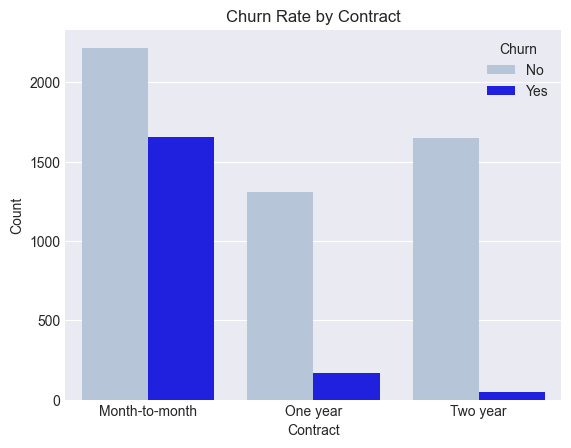

In [535]:
sns.countplot(data= df, x = "Contract", hue="Churn",  palette={"lightsteelblue", "blue"})
plt.title("Churn Rate by Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.show()

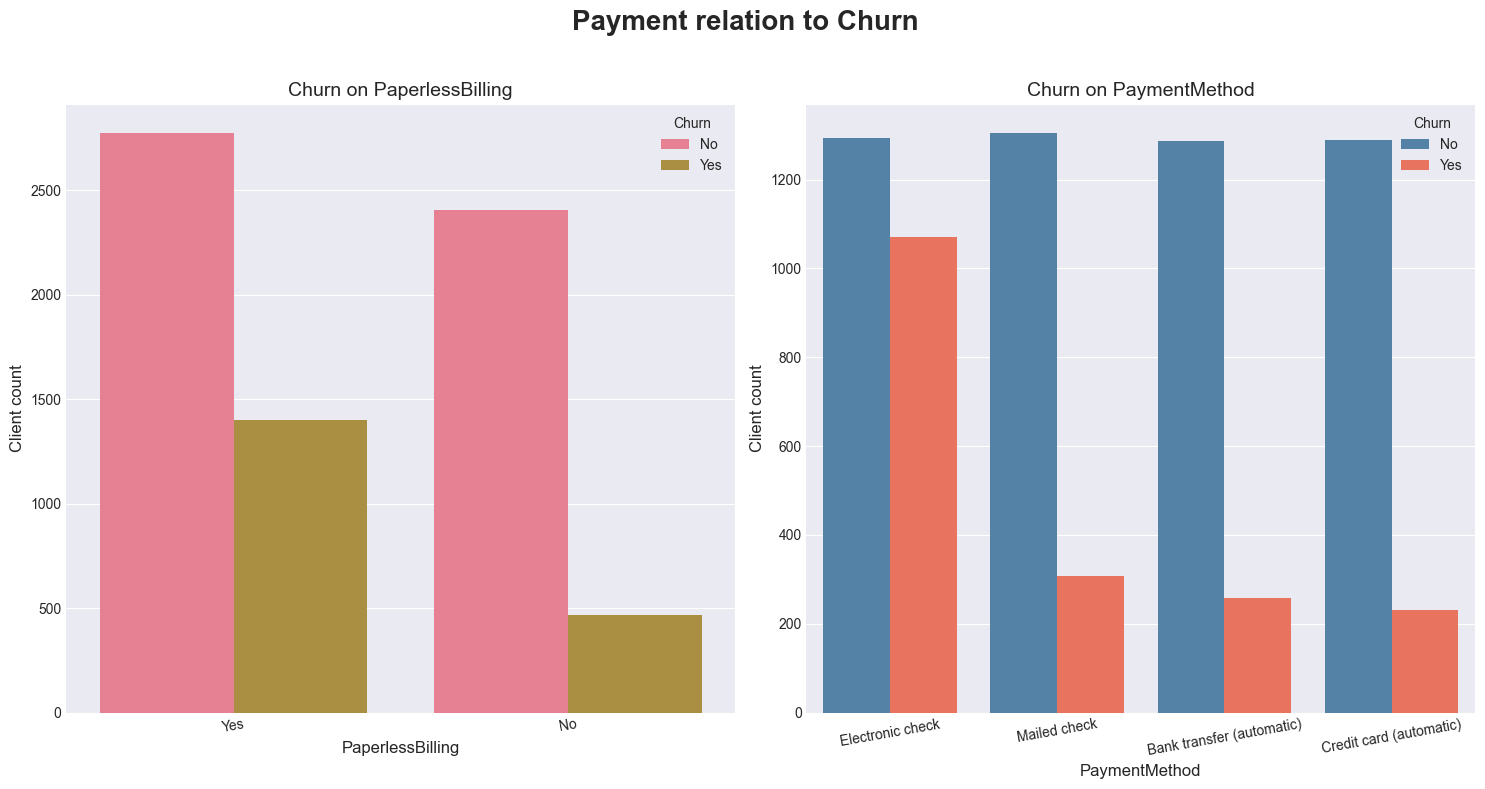

In [536]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Payment relation to Churn', fontsize=20, fontweight='bold')

palette = {'Yes': '#ff6347', 'No': '#4682b4'}
    
sns.countplot(x='PaperlessBilling', data=df, ax=axes[0], hue='Churn')
    
axes[0].set_title(f'Churn on PaperlessBilling', fontsize=14)
axes[0].set_xlabel('PaperlessBilling', fontsize=12)
axes[0].set_ylabel('Client count', fontsize=12)
axes[0].legend(title='Churn')
axes[0].tick_params(axis='x', rotation=10)

sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette=palette)
    
axes[1].set_title(f'Churn on PaymentMethod', fontsize=14)
axes[1].set_xlabel('PaymentMethod', fontsize=12)
axes[1].set_ylabel('Client count', fontsize=12)
axes[1].legend(title='Churn')
axes[1].tick_params(axis='x', rotation=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

### Export to Dashboard

In [538]:
data = df[["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "InternetService", "OnlineSecurity",  "Contract", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn"]]

In [539]:
data.to_csv('cleaned_data.csv', index=False)

### Resampled Data

In [ ]:
from sklearn.utils import resample

In [ ]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

df_1 = df[df["Churn"] == 1]

df_0 = df[df["Churn"] == 0].sample(n=5174, random_state=123)
df_1_upsample = resample(df_1, n_samples=5174, replace=True, random_state=123)

df = pd.concat([df_1_upsample, df_0])

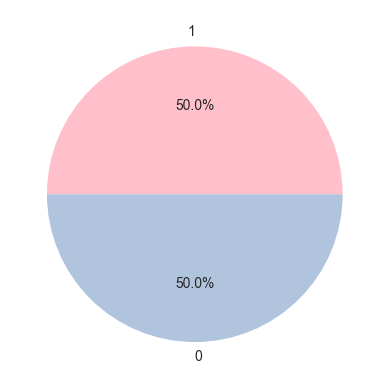


📊 CHURN DISTRIBUTION
Churn distribution:
Churn
1    5174
0    5174
Name: count, dtype: int64


In [ ]:
churn_rate = df["Churn"].value_counts()
plt.pie(churn_rate.values, labels= churn_rate.index, colors = ["pink", "lightsteelblue"], autopct="%1.1f%%")
plt.show()

print("\n" + "=" * 80)
print("📊 CHURN DISTRIBUTION")
print("=" * 80)
print(f"Churn distribution:\n{churn_rate}")

### Remove Labels and Clean Data

In [ ]:
y = df[["Churn"]]

#SplitData
X = df[["SeniorCitizen", "Partner", "Dependents", "tenure", "InternetService", "OnlineSecurity",  "Contract", "PaymentMethod", "MonthlyCharges", "TotalCharges"]]

In [ ]:
X["Partner"] = X["Partner"].apply(lambda x: 1 if x == "Yes" else 0)
X["Dependents"] = X["Dependents"].apply(lambda x: 1 if x == "Yes" else 0)
X["InternetService"] = X["InternetService"].apply(lambda x: 1 if x == "Fiber optic" else 0)
X["OnlineSecurity"] = X["OnlineSecurity"].apply(lambda x: 0 if x == "No" else 1)
X["Contract"] = X["Contract"].apply(lambda x: 0 if x == "Month-to-month" else 1)
X["PaymentMethod"] = X["PaymentMethod"].apply(lambda x: 1 if x == "Electronic check" else 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

X['tenure'] = mms.fit_transform(X[['tenure']])
X['MonthlyCharges'] = mms.fit_transform(X[['MonthlyCharges']])
X['TotalCharges'] = mms.fit_transform(X[['TotalCharges']])
X.head()

joblib.dump(mms, "scaler.pkl")

['scaler.pkl']

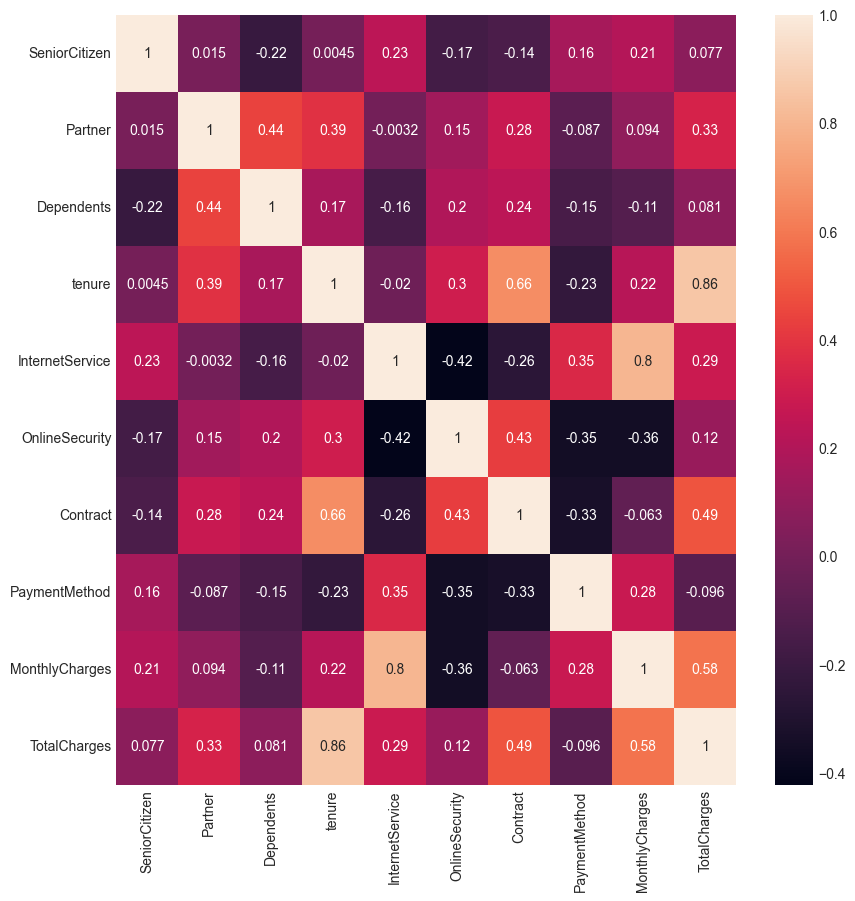

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(X.corr(),annot = True);

### Training Model

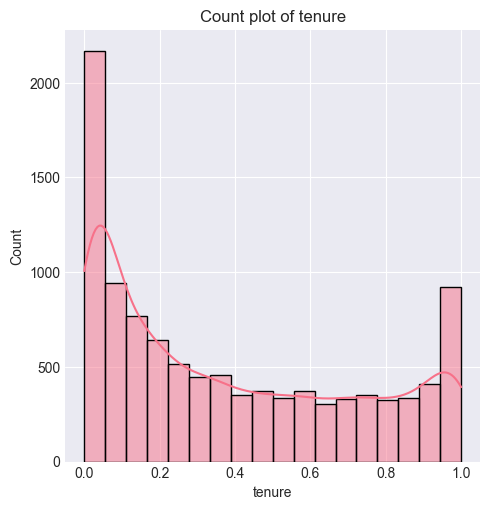

In [ ]:
#Tenure
sns.displot(X["tenure"], kde=True, multiple='stack')
plt.title(f"Count plot of tenure")
plt.show()

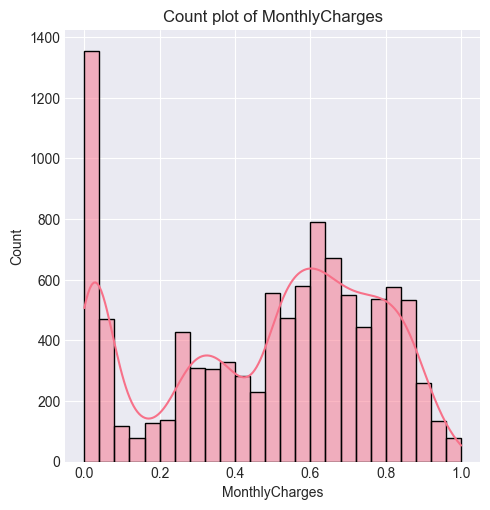

In [ ]:
#MonthlyCharges
sns.displot(X["MonthlyCharges"], kde=True, multiple='stack')
plt.title(f"Count plot of MonthlyCharges")
plt.show()

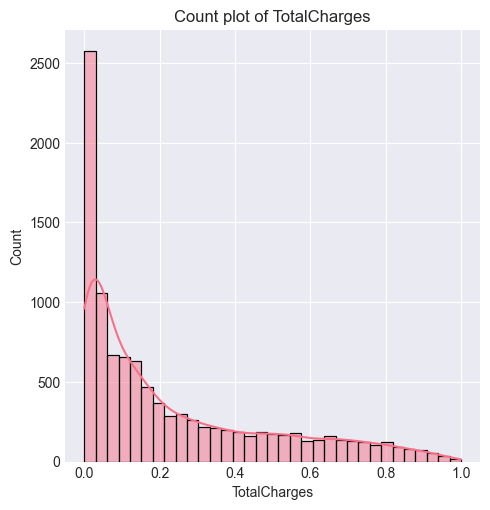

In [ ]:
#TotalCharges
sns.displot(X["TotalCharges"], kde=True, multiple='stack')
plt.title(f"Count plot of TotalCharges")
plt.show()

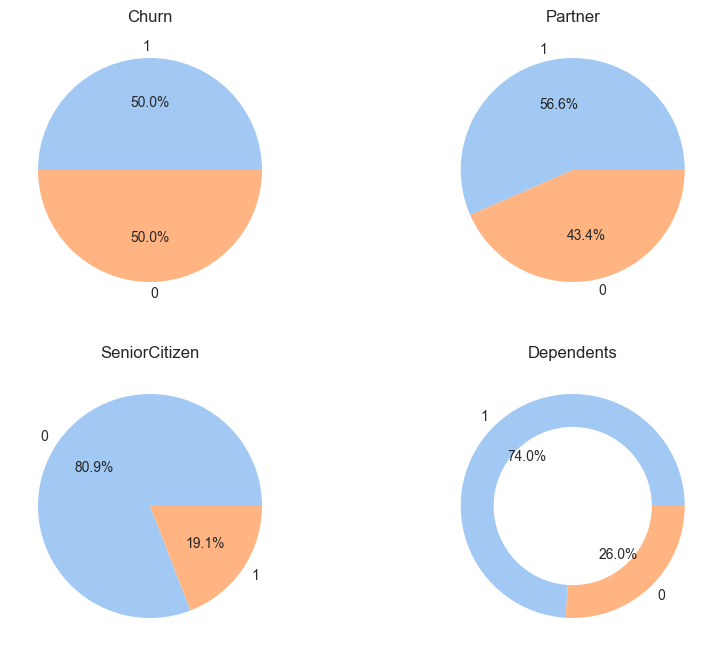

In [ ]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#Churn
labels = y["Churn"].unique()
axes[0,0].set_title("Churn")
axes[0,0].pie(y["Churn"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#SeniorCitizen
labels = X["SeniorCitizen"].unique()
axes[1,0].set_title("SeniorCitizen")
axes[1,0].pie(X["SeniorCitizen"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#Partner
labels = X["Partner"].unique()
axes[0,1].set_title("Partner")
axes[0,1].pie(X["Partner"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#Dependents
labels = X["Dependents"].unique()
plt.title("Dependents")
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(X["Dependents"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

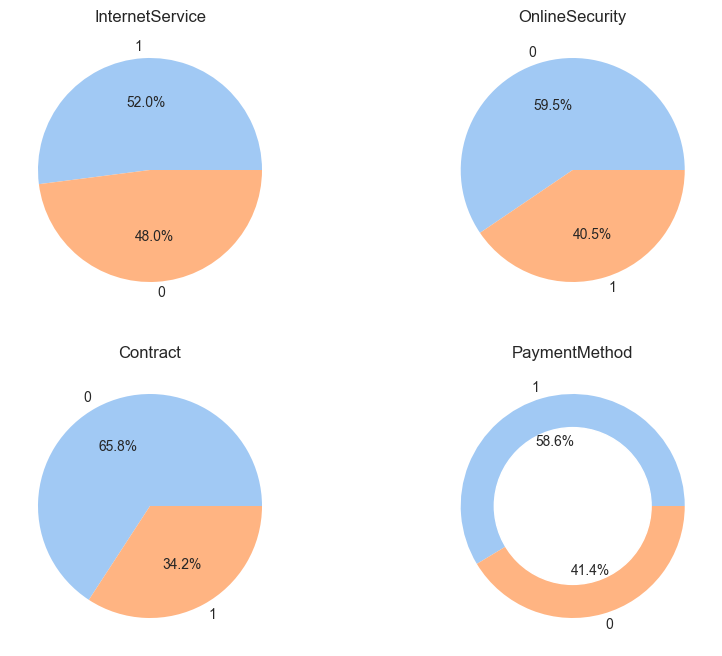

In [ ]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#InternetService
labels = X["InternetService"].unique()
axes[0,0].set_title("InternetService")
axes[0,0].pie(X["InternetService"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#OnlineSecurity
labels = X["OnlineSecurity"].unique()
axes[0,1].set_title("OnlineSecurity")
axes[0,1].pie(X["OnlineSecurity"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#ContractType
labels = X["Contract"].unique()
axes[1,0].set_title("Contract")
axes[1,0].pie(X["Contract"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

#PaymentMethod
labels = X["PaymentMethod"].unique()
plt.title("PaymentMethod")
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(X["PaymentMethod"].value_counts(), labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()